Intro for all models; this'll be the same for everyone; post any changes so that everyone can do it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

Modelling (use your code here)

In [2]:
# set random seed
df=pd.read_excel('ModelingDataset.xlsx')
random_seed = 42

In [3]:
# separate features and target variable
X = df.drop('employee_status', axis=1)
y = df['employee_status']

# split data into train and test sets, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

# check the ratio of binary variable in train and test set
print("Ratio of binary variable in train set: ", y_train.sum() / len(y_train))
print("Ratio of binary variable in test set: ", y_test.sum() / len(y_test))


Ratio of binary variable in train set:  0.27165354330708663
Ratio of binary variable in test set:  0.2716089880268985


Epoch 1/50
223/223 [==============================] - 3s 5ms/step - loss: 0.5038 - accuracy: 0.7570 - val_loss: 0.6631 - val_accuracy: 0.7284
Epoch 2/50
223/223 [==============================] - 1s 3ms/step - loss: 0.4297 - accuracy: 0.8018 - val_loss: 0.5382 - val_accuracy: 0.7318
Epoch 3/50
223/223 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8113 - val_loss: 0.4238 - val_accuracy: 0.8081
Epoch 4/50
223/223 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8205 - val_loss: 0.4838 - val_accuracy: 0.7787
Epoch 5/50
223/223 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8194 - val_loss: 0.4379 - val_accuracy: 0.8010
Epoch 6/50
191/191 [==============================] - 1s 997us/step


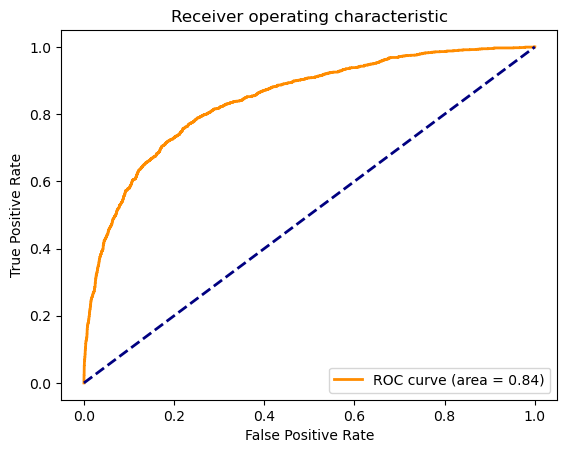

Best threshold: 0.1917833387851715


In [4]:
# Reshape the input data for RNN
n_features = X_train.shape[1]
X_train = X_train.values.reshape((X_train.shape[0], 1, n_features))
X_test = X_test.values.reshape((X_test.shape[0], 1, n_features))

# Define the RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(1, n_features)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions on test set
y_pred_prob = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Find best threshold
best_threshold_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_idx]
print(f"Best threshold: {best_threshold}")

# Convert predicted probabilities to binary class predictions using best threshold
y_pred = (y_pred_prob >= best_threshold).astype(int)

Metrics

In [5]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# display evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print(f'Final Weighted Score for the model is {0.3*accuracy+0.2*precision+0.3*recall+0.2*specificity}')

f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("F1 score:", f1)
print("AUC score:", auc_score)

Accuracy: 0.7677546334262753
Precision: 0.5518134715025906
Recall: 0.7717391304347826
Specificity: 0.7662688583652331
Confusion matrix:
[[3403 1038]
 [ 378 1278]]
Final Weighted Score for the model is 0.7254645951318821
F1 score: 0.6435045317220544
AUC score: 0.7690039944000079
